Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import cv2
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

Load Model and other files

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/GTSRB-Test/GTSRB/old/updated-GTSRB-model.json', 'r')
GTSRB_model_json = json_file.read()
json_file.close()
GTSRB_model = model_from_json(GTSRB_model_json)
# load weights into new model
GTSRB_model.load_weights("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/updated-GTSRB-model.h5")

In [ ]:
# load json and create model
json_file3 = open('/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-model.json', 'r')
BelgiumTS_model_json = json_file3.read()
json_file3.close()
BelgiumTS_model = model_from_json(BelgiumTS_model_json)
# load weights into new model
BelgiumTS_model.load_weights("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-model.h5")

In [ ]:
import pickle
# Load history
GTSRB_hist_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-accuracy.pkl","rb"))
GTSRB_hist_val_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-val-accuracy.pkl","rb"))
GTSRB_hist_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-loss.pkl","rb"))
GTSRB_hist_val_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-val-loss.pkl","rb"))

# Load history
BelgiumTS_hist_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-accuracy.pkl","rb"))
BelgiumTS_hist_val_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-val-accuracy.pkl","rb"))
BelgiumTS_hist_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-loss.pkl","rb"))
BelgiumTS_hist_val_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-val-loss.pkl","rb"))

In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/GTSRB.zip -d /content/GTSRB

Streaming output truncated to the last 5000 lines.
  inflating: /content/GTSRB/train/5/00005_00053_00010.png  
  inflating: /content/GTSRB/train/5/00005_00053_00011.png  
  inflating: /content/GTSRB/train/5/00005_00053_00012.png  
  inflating: /content/GTSRB/train/5/00005_00053_00013.png  
  inflating: /content/GTSRB/train/5/00005_00053_00014.png  
  inflating: /content/GTSRB/train/5/00005_00053_00015.png  
  inflating: /content/GTSRB/train/5/00005_00053_00016.png  
  inflating: /content/GTSRB/train/5/00005_00053_00017.png  
  inflating: /content/GTSRB/train/5/00005_00053_00018.png  
  inflating: /content/GTSRB/train/5/00005_00053_00019.png  
  inflating: /content/GTSRB/train/5/00005_00053_00020.png  
  inflating: /content/GTSRB/train/5/00005_00053_00021.png  
  inflating: /content/GTSRB/train/5/00005_00053_00022.png  
  inflating: /content/GTSRB/train/5/00005_00053_00023.png  
  inflating: /content/GTSRB/train/5/00005_00053_00024.png  
  inflating: /content/GTSRB/train/5/00005_00053_0

In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/Label.zip -d /content/Label

Archive:  /content/drive/MyDrive/GTSRB-Test/Label.zip
  inflating: /content/Label/0.png    
  inflating: /content/Label/1.png    
  inflating: /content/Label/10.png   
  inflating: /content/Label/11.png   
  inflating: /content/Label/12.png   
  inflating: /content/Label/13.png   
  inflating: /content/Label/14.png   
  inflating: /content/Label/15.png   
  inflating: /content/Label/16.png   
  inflating: /content/Label/17.png   
  inflating: /content/Label/18.png   
  inflating: /content/Label/19.png   
  inflating: /content/Label/2.png    
  inflating: /content/Label/20.png   
  inflating: /content/Label/21.png   
  inflating: /content/Label/22.png   
  inflating: /content/Label/23.png   
  inflating: /content/Label/24.png   
  inflating: /content/Label/25.png   
  inflating: /content/Label/26.png   
  inflating: /content/Label/27.png   
  inflating: /content/Label/28.png   
  inflating: /content/Label/29.png   
  inflating: /content/Label/3.png    
  inflating: /content/Label/30.png

In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Testing.zip -d /content/BelgiumTSC_Testing

Archive:  /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Testing.zip
   creating: /content/BelgiumTSC_Testing/Testing/
   creating: /content/BelgiumTSC_Testing/Testing/00000/
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00017_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/00021_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00000/GT-00000.csv  
   creating: /content/BelgiumTSC_Testing/Testing/00001/
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00000.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00001.ppm  
  inflating: /content/BelgiumTSC_Testing/Testing/00001/00252_00002.ppm  
  inflating: /content/BelgiumTSC_Testing/Tes

In [ ]:
!rm /content/BelgiumTSC_Testing/Testing/Readme.txt

In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Training.zip -d /content/BelgiumTSC_Training

Archive:  /content/drive/MyDrive/GTSRB-Test/BelgiumTSC_Training.zip
   creating: /content/BelgiumTSC_Training/Training/
   creating: /content/BelgiumTSC_Training/Training/00000/
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01153_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01160_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00001.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01797_00002.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01798_00000.ppm  
  inflating: /content/BelgiumTSC_Training/Training/00000/01798_00001.ppm

In [ ]:
!rm /content/BelgiumTSC_Training/Training/Readme.txt

GTSRB

Dataset Visualization for GTSRB

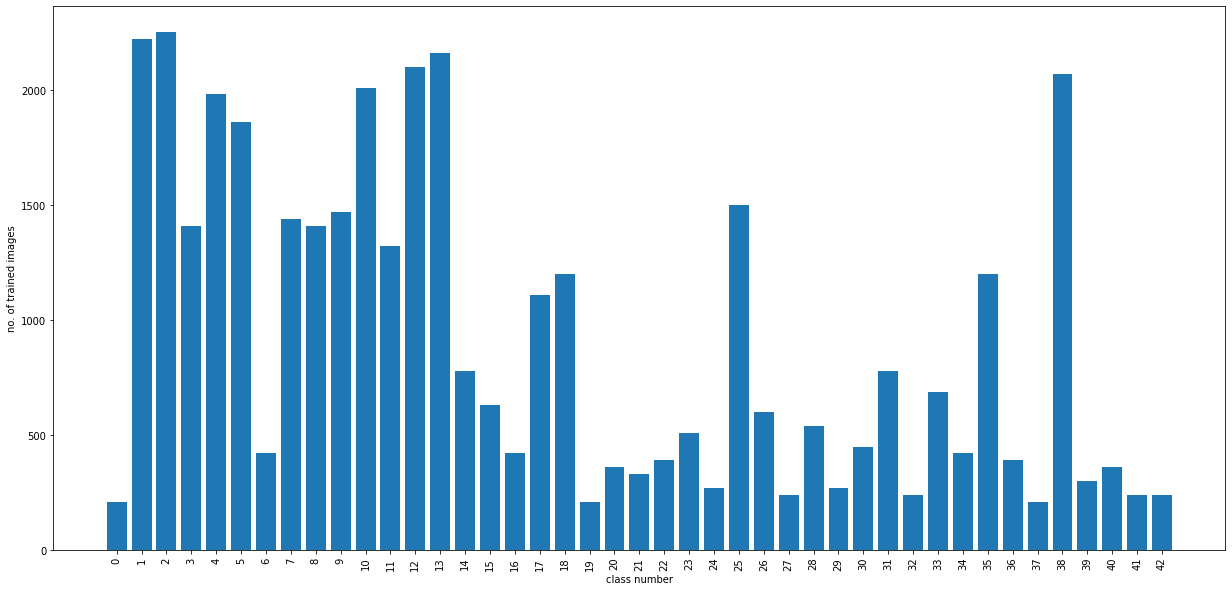

In [ ]:
# Assigning data path
train_path = '/content/GTSRB/Train'
folders = os.listdir(train_path)

train_num = []
class_num = []
dataset_total_num = 0

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_num.append(len(train_files))
    class_num.append(int(folder))
    dataset_total_num += len(train_files)
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_num, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.xlabel('class number')
plt.ylabel('no. of trained images')
plt.show()

In [ ]:
print(dataset_total_num)

39209


In [ ]:
pickle_out = open("GTSRB_total_num.pkl", mode = "wb") 
pickle.dump(dataset_total_num, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("GTSRB_class_num.pkl", mode = "wb") 
pickle.dump(class_num, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("GTSRB_train_num.pkl", mode = "wb") 
pickle.dump(train_num, pickle_out)
pickle_out.close()

Assign Variables and Data

In [ ]:
# Assigning data path
data_dir = '/content/GTSRB'

# Resizing the images to 30x30x3
height = 30
width = 30
channels = 3

In [ ]:
# Preparing test set
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values
data=[]

for i in images:
    try:
        image = cv2.imread(data_dir + '/' +i)
        fromarray = Image.fromarray(image, 'RGB')
        resized_image = fromarray.resize((height, width))
        resized_image = np.array(resized_image)
        data.append(resized_image)
    except:
        print("Error in " + i)

Prediction for GTSRB

In [ ]:
# Prediction
X_pred = np.array(data)
X_pred = X_pred/255  #normalize

pred = np.argmax(GTSRB_model.predict(X_pred), axis = -1)

In [ ]:
from sklearn.metrics import accuracy_score
GTSRB_acc = accuracy_score(labels, pred)*100
print('Test Data accuracy for GTSRB: ', GTSRB_acc)

Test Data accuracy for GTSRB:  98.03642121931908


In [ ]:
pickle_out = open("GTSRB_acc.pkl", mode = "wb") 
pickle.dump(GTSRB_acc, pickle_out)
pickle_out.close()

Graph Visualization for GTSRB

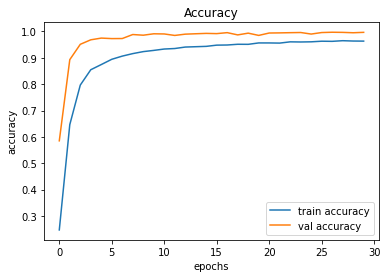

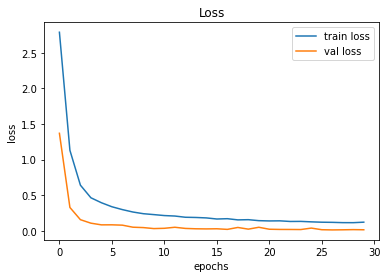

In [ ]:
# plotting graphs for accuracy and loss

plt.figure(0)
plt.plot(GTSRB_hist_acc, label='train accuracy')
plt.plot(GTSRB_hist_val_acc, label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(GTSRB_hist_loss, label='train loss')
plt.plot(GTSRB_hist_val_loss, label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Summary for GTSRB

In [ ]:
GTSRB_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_42 (Batc (None, 30, 30, 3)         12        
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        896       
_________________________________________________________________
batch_normalization_43 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_43 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_44 (Batc (None, 12, 12, 32)       

In [ ]:
from contextlib import redirect_stdout

with open('GTSRB_model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        GTSRB_model.summary()

Classification Report for GTSRB

In [ ]:
from sklearn.metrics import classification_report

GTSRB_class_report = classification_report(labels, pred)
print(GTSRB_class_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       0.99      0.99      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.99      0.98       450
           4       1.00      0.98      0.99       660
           5       0.99      0.98      0.99       630
           6       0.99      1.00      1.00       150
           7       0.98      1.00      0.99       450
           8       0.99      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       0.99      1.00      1.00       660
          11       0.99      0.96      0.97       420
          12       1.00      0.95      0.97       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      0.99       270
          15       0.85      1.00      0.91       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [ ]:
pickle_out = open("GTSRB_class_report.pkl", mode = "wb") 
pickle.dump(GTSRB_class_report, pickle_out)
pickle_out.close()

Predicts an image for GTSRB

In [ ]:
data=[]
image = cv2.imread('/content/GTSRB/Test/01550.png')
fromarray = Image.fromarray(image, 'RGB')
resized_image = fromarray.resize((30, 30))
resized_image = np.array(resized_image)
data.append(resized_image)

In [ ]:
import time

In [ ]:
# Prediction
X_pred = np.array(data)
X_pred = X_pred/255

start_time = time.time()
pred = np.argmax(GTSRB_model.predict(X_pred), axis = -1)
end_time = time.time() - start_time

In [ ]:
print(end_time)

0.04797649383544922


In [ ]:
pred

array([13])

In [ ]:
for x in pred:
  num = x

print(num)

13


LIME - Image Interpretation

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c3a372f25b3018b955157cbb41c570ca5285d07da04e34ac0ae0c85101ae6d97
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

def read_and_transform_img(url):
    img = cv2.imread(url)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((30, 30))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)

    return img

In [ ]:
images = read_and_transform_img('/content/GTSRB/Test/01121.png')

explanation = explainer.explain_instance(images[0].astype('double'), GTSRB_model.predict,  
                                         top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


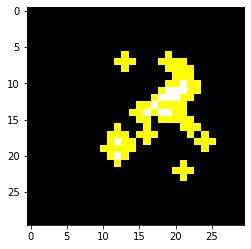

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

BelgiumTS

Dataset Visualization for BelgiumTS

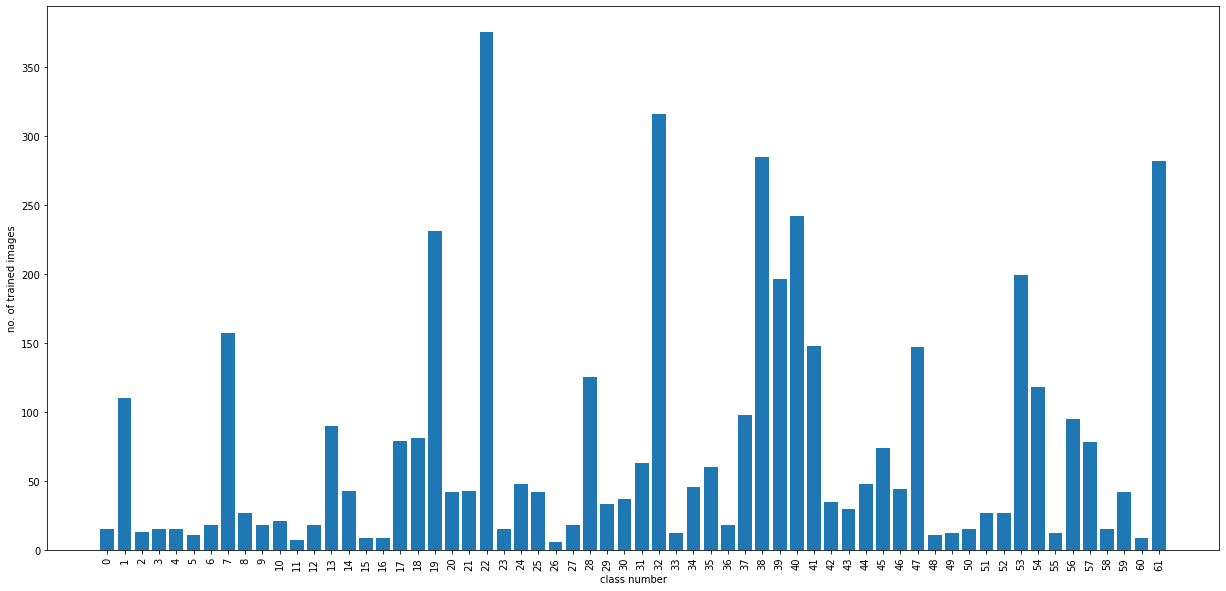

In [ ]:
# Assigning data path
train_path = '/content/BelgiumTSC_Training/Training'
folders = os.listdir(train_path)

train_num = []
class_num = []
dataset_total_num = 0

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_num.append(len(train_files)-1)
    class_num.append(int(folder))
    dataset_total_num = dataset_total_num + len(train_files) -1
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_num, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.xlabel('class number')
plt.ylabel('no. of trained images')
plt.show()

In [ ]:
print(dataset_total_num)

4575


In [ ]:
pickle_out = open("BelgiumTS_total_num.pkl", mode = "wb") 
pickle.dump(dataset_total_num, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("BelgiumTS_class_num.pkl", mode = "wb") 
pickle.dump(class_num, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("BelgiumTS_train_num.pkl", mode = "wb") 
pickle.dump(train_num, pickle_out)
pickle_out.close()

Assign Variables and Data

In [ ]:
# Assigning data path
test_path = '/content/BelgiumTSC_Testing/Testing'

#find total classes in testing set
NUM_CATEGORIES = len(os.listdir(test_path))
NUM_CATEGORIES

lst = os.listdir(test_path)
lst.sort()

# Resizing the images to 30x30x3
height = 30
width = 30
channels = 3

# Declaring data and labels

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = test_path + '/' + str(lst[i])
    images = os.listdir(path)

    for img in images:
        if img.endswith(".ppm"):
          try:
              image = cv2.imread(path + '/' + img)
              image = cv2.resize(image,(height,width))
              data.append(image)
              labels.append(i)
          except:
              print("Error: " + img)

# Changing the list to numpy array

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(2520, 30, 30, 3) (2520,)


Prediction for BelgiumTS

In [ ]:
predict = np.argmax(BelgiumTS_model.predict(data), axis = -1)
predict

array([ 0,  0,  0, ..., 61, 61, 61])

In [ ]:
from sklearn.metrics import accuracy_score
BelgiumTS_acc = accuracy_score(labels, predict)*100
print('Test Data accuracy for BelgiumTS: ', BelgiumTS_acc)

Test Data accuracy for BelgiumTS:  96.86507936507937


In [ ]:
pickle_out = open("BelgiumTS_acc.pkl", mode = "wb") 
pickle.dump(BelgiumTS_acc, pickle_out)
pickle_out.close()

Graph Visualization for BelgiumTS

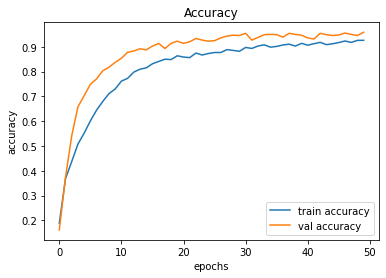

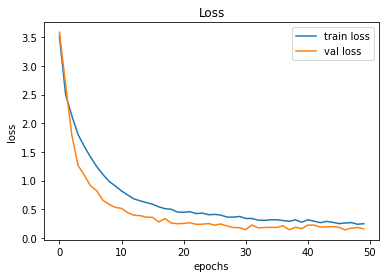

In [ ]:
# plotting graphs for accuracy and loss

plt.figure(0)
plt.plot(BelgiumTS_hist_acc, label='train accuracy')
plt.plot(BelgiumTS_hist_val_acc, label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(BelgiumTS_hist_loss, label='train loss')
plt.plot(BelgiumTS_hist_val_loss, label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Summary for BelgiumTS

In [ ]:
BelgiumTS_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 30, 30, 3)         12        
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 32)       

In [ ]:
from contextlib import redirect_stdout

with open('BelgiumTS_model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        BelgiumTS_model.summary()

Classification Report for BelgiumTS

In [ ]:
from sklearn.metrics import classification_report

BelgiumTS_class_report = classification_report(labels, predict)
print(BelgiumTS_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.87      1.00      0.93        27
           2       1.00      0.43      0.60         7
           3       1.00      0.67      0.80         6
           4       1.00      0.83      0.91        12
           5       1.00      1.00      1.00         3
           6       0.56      0.83      0.67         6
           7       0.96      1.00      0.98        90
           8       0.86      1.00      0.92        12
          10       0.96      0.89      0.93        28
          12       1.00      1.00      1.00         3
          13       0.97      0.92      0.95        39
          14       0.68      1.00      0.81        15
          16       1.00      0.42      0.59        12
          17       0.97      0.99      0.98       183
          18       0.98      0.97      0.98       122
          19       0.99      1.00      1.00       163
          20       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pickle_out = open("BelgiumTS_class_report.pkl", mode = "wb") 
pickle.dump(BelgiumTS_class_report, pickle_out)
pickle_out.close()

Predicts an image for BelgiumTS

In [ ]:
data=[]
img = cv2.imread('/content/BelgiumTSC_Testing/Testing/00044/02106_00002.ppm')
img = cv2.resize(img,(30,30))
data.append(img)
data = np.array(data)
data

array([[[[237, 253, 252],
         [204, 219, 249],
         [ 85,  95, 180],
         ...,
         [ 18,  28, 152],
         [ 21,  28, 154],
         [ 37,  39, 154]],

        [[153, 165, 227],
         [ 58,  64, 157],
         [ 29,  31, 140],
         ...,
         [ 23,  30, 147],
         [ 25,  30, 152],
         [ 29,  29, 153]],

        [[ 36,  42, 145],
         [ 24,  25, 142],
         [ 27,  26, 139],
         ...,
         [ 28,  32, 113],
         [ 32,  34, 142],
         [ 31,  32, 153]],

        ...,

        [[217, 228, 233],
         [209, 228, 230],
         [196, 221, 236],
         ...,
         [ 20,  23, 117],
         [ 19,  22, 114],
         [ 24,  27, 112]],

        [[209, 227, 233],
         [208, 228, 234],
         [205, 222, 233],
         ...,
         [ 19,  23, 112],
         [ 36,  44, 113],
         [109, 123, 164]],

        [[203, 228, 236],
         [203, 227, 233],
         [204, 223, 228],
         ...,
         [ 67,  78, 129],
        

In [ ]:
timeha1 = time.time()
predict = np.argmax(BelgiumTS_model.predict(data), axis = -1)
timeha2 = time.time() - timeha1
predict

array([44])

In [ ]:
print(timeha2)

0.05222272872924805


Deploying the app

In [ ]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

     |████████████████████████████████| 746 kB 5.1 MB/s 
     |████████████████████████████████| 8.0 MB 4.6 MB/s 
     |████████████████████████████████| 170 kB 60.3 MB/s 
     |████████████████████████████████| 111 kB 56.4 MB/s 
     |████████████████████████████████| 75 kB 3.2 MB/s 
     |████████████████████████████████| 4.2 MB 20.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 122 kB 56.7 MB/s 
     |████████████████████████████████| 786 kB 45.2 MB/s 
     |████████████████████████████████| 368 kB 47.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython

In [ ]:
%%writefile app.py

import pandas as pd
import numpy as np
import streamlit as st
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import model_from_json
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
import time
from keras import backend as K
import cv2
import time
import pickle
from os import listdir
from os.path import isfile, join, isdir

from lime import lime_image
from skimage.segmentation import mark_boundaries


explainer = lime_image.LimeImageExplainer()

def read_and_transform_img(url):
    img = Image.fromarray(url, 'RGB')
    img = img.resize((30, 30))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)

    return img


# load json and create model for GTSRB and BelgiumTS
json_file = open('/content/drive/MyDrive/GTSRB-Test/GTSRB/old/updated-GTSRB-model.json', 'r')
GTSRB_model_json = json_file.read()
json_file.close()
GTSRB_model = model_from_json(GTSRB_model_json)
# load weights into new model
GTSRB_model.load_weights("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/updated-GTSRB-model.h5")

json_file3 = open('/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-model.json', 'r')
BelgiumTS_model_json = json_file3.read()
json_file3.close()
BelgiumTS_model = model_from_json(BelgiumTS_model_json)
# load weights into new model
BelgiumTS_model.load_weights("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-model.h5")


# load train number and class number for GTSRB and BelgiumTS
GTSRB_total_num = pickle.load(open("/content/GTSRB_total_num.pkl","rb")) 
GTSRB_train_num = pickle.load(open("/content/GTSRB_train_num.pkl","rb"))
GTSRB_class_num = pickle.load(open("/content/GTSRB_class_num.pkl","rb"))

BelgiumTS_total_num = pickle.load(open("/content/BelgiumTS_total_num.pkl","rb")) 
BelgiumTS_train_num = pickle.load(open("/content/BelgiumTS_train_num.pkl","rb"))
BelgiumTS_class_num = pickle.load(open("/content/BelgiumTS_class_num.pkl","rb"))


# load model.summary() for GTSRB and BelgiumTS
GTSRB_model_summary = open('/content/GTSRB_model_summary.txt', 'r')
GTSRB_model_summary_text = GTSRB_model_summary.read()
GTSRB_model_summary.close()

BelgiumTS_model_summary = open('/content/BelgiumTS_model_summary.txt', 'r')
BelgiumTS_model_summary_text = BelgiumTS_model_summary.read()
BelgiumTS_model_summary.close()


# load history accuracy, validation accuracy, loss and validation loss for GTSRB and BelgiumTS
GTSRB_hist_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-accuracy.pkl","rb"))
GTSRB_hist_val_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-val-accuracy.pkl","rb"))
GTSRB_hist_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-loss.pkl","rb"))
GTSRB_hist_val_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/GTSRB/old/history-val-loss.pkl","rb"))

BelgiumTS_hist_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-accuracy.pkl","rb"))
BelgiumTS_hist_val_acc = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-val-accuracy.pkl","rb"))
BelgiumTS_hist_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-loss.pkl","rb"))
BelgiumTS_hist_val_loss = pickle.load(open("/content/drive/MyDrive/GTSRB-Test/BelgiumTS/Old/BelgiumTS-history-val-loss.pkl","rb"))


# load model accuracy for GTSRB and BelgiumTS
GTSRB_acc = pickle.load(open('GTSRB_acc.pkl', 'rb'))

BelgiumTS_acc = pickle.load(open('BelgiumTS_acc.pkl', 'rb'))


# load classification report for GTSRB and BelgiumTS
GTSRB_class_report = pickle.load(open('GTSRB_class_report.pkl', 'rb'))

BelgiumTS_class_report = pickle.load(open('BelgiumTS_class_report.pkl', 'rb'))


# Main app
st.title('Traffic Sign Classification')

st.sidebar.title("Navigation")
nav = st.sidebar.radio("",["Image Classification","Dataset Details","Model Summary","Report"])

if nav=="Image Classification":
  navigation = st.radio("Select dataset.",["GTSRB","BelgiumTS"])
  if navigation=="GTSRB":
    GTSRB_Test = [f for f in listdir("/content/GTSRB/Test/") if isfile(join("/content/GTSRB/Test/", f))]
    imageselect = st.selectbox("Pick an image.", GTSRB_Test)
    image = Image.open("/content/GTSRB/Test/" + imageselect)
    st.image(image, caption="Let's predict the traffic sign!", use_column_width=True)

    if st.button('GTSRB: Predict Traffic Sign'):
            image = cv2.imread("/content/GTSRB/Test/" + imageselect)
            data=[]
            fromarray = Image.fromarray(image, 'RGB')
            resized_image = fromarray.resize((30, 30))
            resized_image = np.array(resized_image)
            data.append(resized_image)
            # Prediction
            X_pred = np.array(data)
            X_pred = X_pred/255
            time1 = time.time()
            pred = np.argmax(GTSRB_model.predict(X_pred), axis = -1)
            time2 = time.time() - time1
            for x in pred:
              predicted = x

            st.write("Predicted Label: ", predicted)
            st.write("Execution time (seconds): ", time2)
            images = read_and_transform_img(image)
            explanation = explainer.explain_instance(images[0].astype('double'), GTSRB_model.predict, top_labels=5, hide_color=0, num_samples=1000)
            temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
            plt.imshow(mark_boundaries(temp, mask))
            st.set_option('deprecation.showPyplotGlobalUse', False)
            st.pyplot()

    labelfiles = [f for f in listdir("/content/Label/") if isfile(join("/content/Label/", f))]
    labelselect = st.selectbox("Label list, Select the predicted label to check if true", labelfiles)
    labelimage = Image.open("/content/Label/" + labelselect)
    st.image(labelimage)

  if navigation=="BelgiumTS":
    BelgiumTS_Test = [f for f in listdir("/content/BelgiumTSC_Testing/Testing/") if isdir(join("/content/BelgiumTSC_Testing/Testing/", f))]
    BelgiumTS_Test_Select = st.selectbox("Pick a class.", BelgiumTS_Test)
    BelgiumTS_Test_Images = [f for f in listdir("/content/BelgiumTSC_Testing/Testing/" + BelgiumTS_Test_Select) if isfile(join("/content/BelgiumTSC_Testing/Testing/" + BelgiumTS_Test_Select, f))]
    BelgiumTS_Test_Images_Select = st.selectbox("Pick an image.", BelgiumTS_Test_Images)
    image2 = Image.open("/content/BelgiumTSC_Testing/Testing/" + BelgiumTS_Test_Select + "/" + BelgiumTS_Test_Images_Select)
    st.image(image2, caption="Let's predict the traffic sign!", use_column_width=True)

    if st.button('BelgiumTS: Predict Traffic Sign'):
            image = cv2.imread("/content/BelgiumTSC_Testing/Testing/" + BelgiumTS_Test_Select + "/" + BelgiumTS_Test_Images_Select)
            data=[]
            image = cv2.resize(image,(30,30))
            data.append(image)
            data = np.array(data)
            # Prediction
            time1 = time.time()
            pred = np.argmax(BelgiumTS_model.predict(data), axis = -1)
            time2 = time.time() - time1
            for x in pred:
              predicted = x

            st.write("Predicted Label: ", predicted)
            st.write("Execution time (seconds): ", time2)


if nav=="Dataset Details":
  navigation = st.radio("Select dataset.",["GTSRB","BelgiumTS"])
  if navigation=="GTSRB":
    st.write("Dataset total number of images: ", GTSRB_total_num)
    # Plotting the number of images in each class
    plt.figure(figsize=(21,10))  
    plt.bar(GTSRB_class_num, GTSRB_train_num)
    plt.xticks(GTSRB_class_num, rotation='vertical')
    plt.xlabel('class number')
    plt.ylabel('no. of trained images')
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

  if navigation=="BelgiumTS":
    st.write("Dataset total number of images: ", BelgiumTS_total_num)
    # Plotting the number of images in each class
    plt.figure(figsize=(21,10))  
    plt.bar(BelgiumTS_class_num, BelgiumTS_train_num)
    plt.xticks(BelgiumTS_class_num, rotation='vertical')
    plt.xlabel('class number')
    plt.ylabel('no. of trained images')
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()


if nav=="Model Summary":
  navigation = st.radio("Select dataset.",["GTSRB","BelgiumTS"])
  if navigation=="GTSRB":
    st.write(GTSRB_model_summary_text)

  if navigation=="BelgiumTS":
    st.write(BelgiumTS_model_summary_text)


if nav=="Report":
  navigation = st.radio("Select dataset.",["GTSRB","BelgiumTS"])
  if navigation=="GTSRB":
    st.write("Model accuracy for GTSRB (%): ", GTSRB_acc)
    st.write("")

    # plotting graphs for accuracy and loss
    st.write("Graph for Accuracy and Loss:")
    plt.figure(0)
    plt.plot(GTSRB_hist_acc, label='train accuracy')
    plt.plot(GTSRB_hist_val_acc, label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    plt.figure(1)
    plt.plot(GTSRB_hist_loss, label='train loss')
    plt.plot(GTSRB_hist_val_loss, label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    st.write("")
    st.write("Classification Report for GTSRB:")
    st.write(GTSRB_class_report)

  if navigation=="BelgiumTS":
    st.write("Model accuracy for BelgiumTS (%): ", BelgiumTS_acc)
    st.write("")

    # plotting graphs for accuracy and loss
    st.write("Graph for Accuracy and Loss:")
    plt.figure(0)
    plt.plot(BelgiumTS_hist_acc, label='train accuracy')
    plt.plot(BelgiumTS_hist_val_acc, label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    plt.figure(1)
    plt.plot(BelgiumTS_hist_loss, label='train loss')
    plt.plot(BelgiumTS_hist_val_loss, label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    st.write("")
    st.write("Classification Report for BelgiumTS:")
    st.write(BelgiumTS_class_report)

Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://011701e012df.ngrok.io" -> "http://localhost:8501">